In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import KFold # import KFold
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Accident_Severity/Road_Accident.csv')
df

,Day_of_week,Time,District,Thana,Area_accident_occured,Road_Name,Type_of_collision,Number_of_vehicles_involved,Type_of_vehicle1,Type_of_vehicle2,Number_of_casualties,Casualty_class,Accident_severity
0,Thu,Night,Mymensingh,Sadar,charkalibari,Mymensingh-Sherpur,Rear end,2,Motorcycle,Motorcycle,2,na,Slight Injury
1,Fri,Night,Rajshahi,Sadar,stadium area,NaN,Rear end,2,Motorcycle,Motorcycle,2,na,Slight Injury
2,Fri,Day,Shariatpur,NaN,in front of chatiyani bridge,Shariatpur-goshairhat,Hit pedestrian,2,NaN,NaN,2,Driver or rider,Serious Injury
3,Fri,Unspecified,Jessore,chowgacha,Chandpur,chowgacha-jhikorgacha,Rear end,2,Motorcycle,Motorcycle,2,Pedestrian,Slight Injury
4,Fri,Unspecified,Bogra,Sadar,kanochgari,Bogra-Dhaka,Hit object in road,2,NaN,NaN,2,na,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Tue,day,Kurigram,Raumari,Jadurchar Girls School,Raumari-Dhaka,Collision,2,Truck,Truck,1,na,Slight Injury
12312,Tue,day,Chittagong,Raujan,Pahartole,?,Overtrurn,2,NaN,NaN,1,na,Slight Injury
12313,Tue,day,Gopalganj,Sadar,Badgram,Dhaka-Khulna,Road Accident,1,NaN,NaN,1,Driver or rider,Serious Injury
12314,Tue,day,Sylhet,Kanaighat,?,?,Overtrurn,2,NaN,NaN,1,na,Slight Injury


In [ ]:
df.sample(5)

,Day_of_week,Time,District,Thana,Area_accident_occured,Road_Name,Type_of_collision,Number_of_vehicles_involved,Type_of_vehicle1,Type_of_vehicle2,Number_of_casualties,Casualty_class,Accident_severity
914,Sun,Day,Narayanganj,Keraniganj,Keraniganj,Narayanganj,Hit Pedestrian,2,NaN,NaN,1,Driver or rider,Serious Injury
11927,Sun,Day,Jessore,Abhoynagar,Nowapara,Jessore-Khulna,Lost Control,2,NaN,NaN,1,Driver or rider,Serious Injury
9132,Sat,Day,Sirajganj,Belkuchi,NaN,Sirajganj,Hit Pedestrian,2,NaN,NaN,2,Passenger,Slight Injury
9466,Tus,Day,Manikganj,Ghior,Ghior Bus Station,Dhaka-Aricha,Hit Pedestrian,1,NaN,NaN,1,Driver or rider,Slight Injury
6237,Mon,Day,Naogaon,Naogaon Sadar,Paharpur,Naogaon,Hit Pedestrian,2,NaN,NaN,1,Passenger,Slight Injury


In [ ]:
df.shape

(12316, 13)

In [ ]:
df.columns

Index(['Day_of_week', 'Time', 'District', 'Thana', 'Area_accident_occured',
       'Road_Name', 'Type_of_collision', 'Number_of_vehicles_involved',
       'Type_of_vehicle1', 'Type_of_vehicle2', 'Number_of_casualties',
       'Casualty_class', 'Accident_severity'],
      dtype='object')

In [ ]:
df.describe(include="all")

,Day_of_week,Time,District,Thana,Area_accident_occured,Road_Name,Type_of_collision,Number_of_vehicles_involved,Type_of_vehicle1,Type_of_vehicle2,Number_of_casualties,Casualty_class,Accident_severity
count,12208,11857,12316,12127,11668,9676,12307,12316.000000,5133,5133,12316.000000,12316,12316
unique,30,15,82,2260,7966,1674,68,NaN,177,177,NaN,4,3
top,Sat,Day,Dhaka,Sadar,Sherpur,Dhaka,Hit Pedestrian,NaN,Motor Cycle,Motor Cycle,NaN,Driver or rider,Slight Injury
freq,1771,9797,1035,689,51,554,4128,NaN,1441,1441,NaN,4944,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.040679,NaN,NaN,1.548149,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.688790,NaN,NaN,1.007179,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,NaN


In [ ]:
df.dtypes

Day_of_week                    object
Time                           object
District                       object
Thana                          object
Area_accident_occured          object
Road_Name                      object
Type_of_collision              object
Number_of_vehicles_involved     int64
Type_of_vehicle1               object
Type_of_vehicle2               object
Number_of_casualties            int64
Casualty_class                 object
Accident_severity              object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12208 non-null  object
 1   Time                         11857 non-null  object
 2   District                     12316 non-null  object
 3   Thana                        12127 non-null  object
 4   Area_accident_occured        11668 non-null  object
 5   Road_Name                    9676 non-null   object
 6   Type_of_collision            12307 non-null  object
 7   Number_of_vehicles_involved  12316 non-null  int64 
 8   Type_of_vehicle1             5133 non-null   object
 9   Type_of_vehicle2             5133 non-null   object
 10  Number_of_casualties         12316 non-null  int64 
 11  Casualty_class               12316 non-null  object
 12  Accident_severity            12316 non-null  object
dtypes: int64(2), object(11)
memory 

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12311    False
12312    False
12313    False
12314    False
12315    False
Length: 12316, dtype: bool

In [ ]:
df.duplicated().sum()

17

In [ ]:
df.groupby('Accident_severity').size()

Accident_severity
Fatal injury        158
Serious Injury     1743
Slight Injury     10415
dtype: int64

In [ ]:
df.isnull().sum()

Day_of_week                     108
Time                            459
District                          0
Thana                           189
Area_accident_occured           648
Road_Name                      2640
Type_of_collision                 9
Number_of_vehicles_involved       0
Type_of_vehicle1               7183
Type_of_vehicle2               7183
Number_of_casualties              0
Casualty_class                    0
Accident_severity                 0
dtype: int64

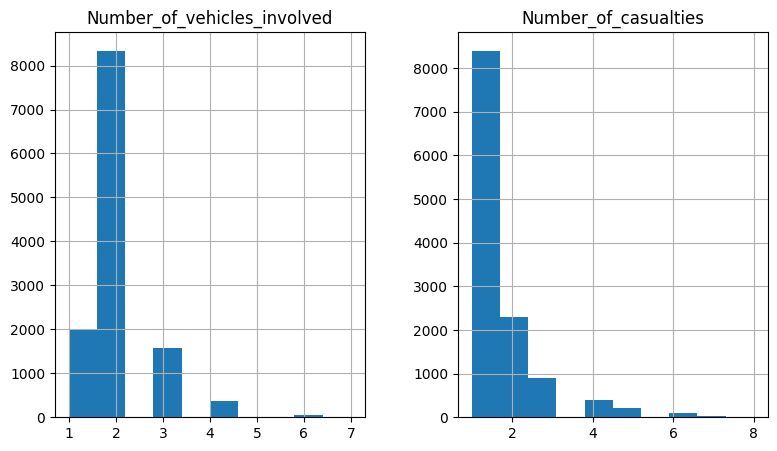

In [ ]:
df.hist(layout=(1,6), figsize=(30,5))
plt.show()

In [ ]:
df['Number_of_casualties'].value_counts()

1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: Number_of_casualties, dtype: int64

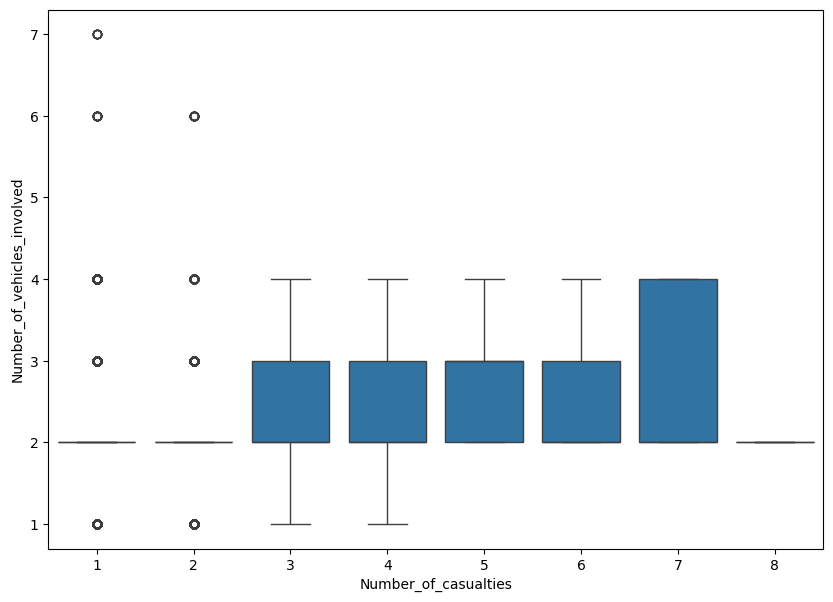

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='Number_of_vehicles_involved', x='Number_of_casualties')
plt.show()

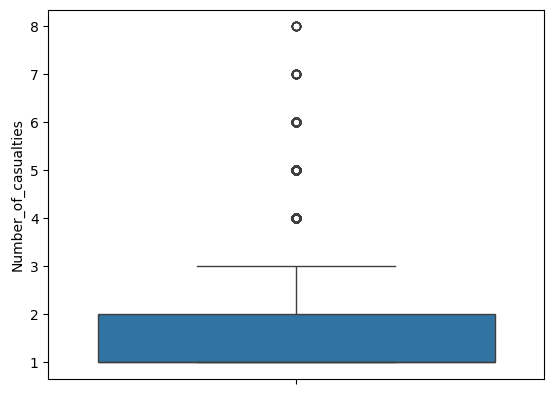

In [ ]:
sns.boxplot(data=df, y='Number_of_casualties')
plt.show()

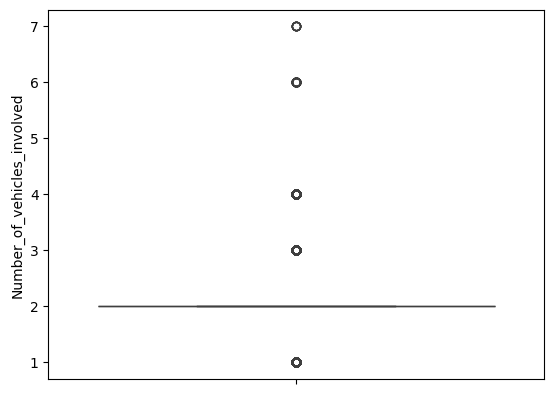

In [ ]:
sns.boxplot(data=df, y='Number_of_vehicles_involved')
plt.show()

In [ ]:
df['Number_of_vehicles_involved']

0        2
1        2
2        2
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: Number_of_vehicles_involved, Length: 12316, dtype: int64

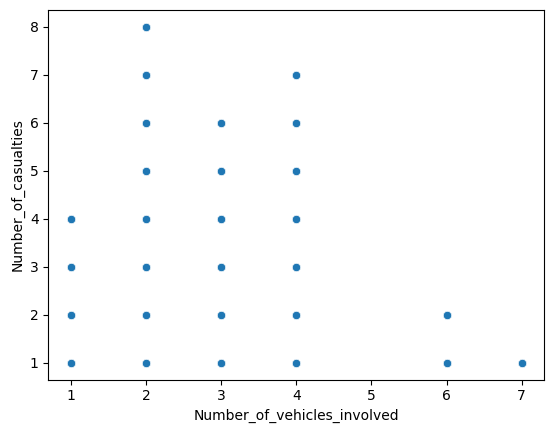

In [ ]:
sns.scatterplot(x=df['Number_of_vehicles_involved'], y=df['Number_of_casualties'])
plt.show()

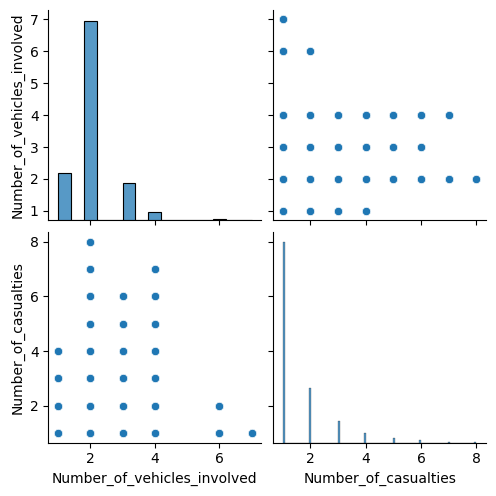

In [ ]:
sns.pairplot(df[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

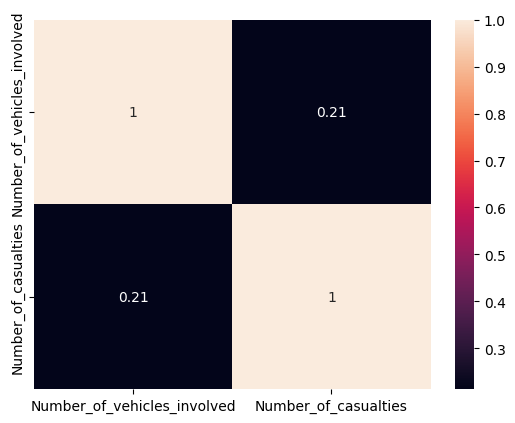

In [ ]:
correlation_matrix = df[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

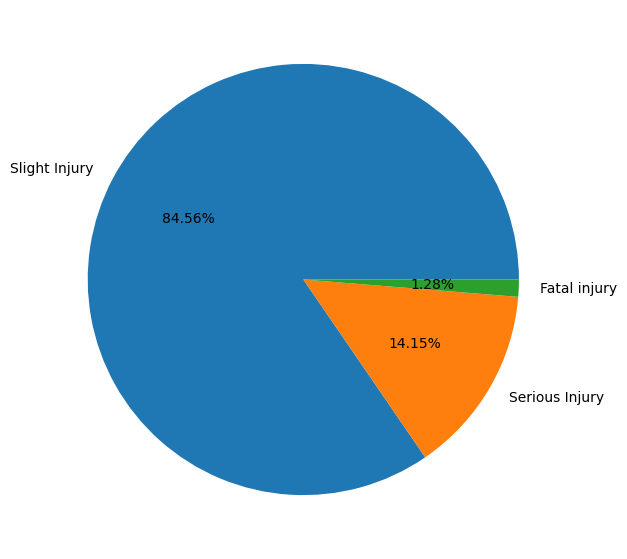

In [ ]:
plt.figure(figsize=(10,7))
plt.pie(x=df['Accident_severity'].value_counts().values,
        labels=df['Accident_severity'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

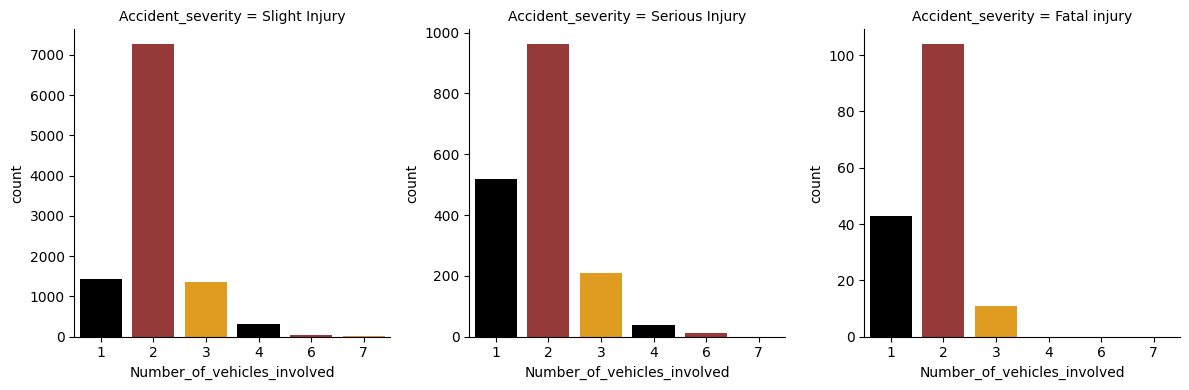

In [ ]:
grid = sns.FacetGrid(data=df, col='Accident_severity', height=4, aspect=1, sharey=False)
grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

In [ ]:
df.columns

Index(['Day_of_week', 'Time', 'District', 'Thana', 'Area_accident_occured',
       'Road_Name', 'Type_of_collision', 'Number_of_vehicles_involved',
       'Type_of_vehicle1', 'Type_of_vehicle2', 'Number_of_casualties',
       'Casualty_class', 'Accident_severity'],
      dtype='object')

In [ ]:
# dropping columns that can cause imbalance while imputation
lists=['Day_of_week','Time','District','Thana','Area_accident_occured','Road_Name','Type_of_vehicle1', 'Type_of_vehicle2']
df.drop(columns = lists, inplace=True)

In [ ]:
df.shape

(12316, 5)

In [ ]:
df.columns

Index(['Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Casualty_class', 'Accident_severity'],
      dtype='object')

In [ ]:
df.isnull().sum()

Type_of_collision              9
Number_of_vehicles_involved    0
Number_of_casualties           0
Casualty_class                 0
Accident_severity              0
dtype: int64

Class 0: 10415
Class 1: 1743
Proportion: 5.98 : 1


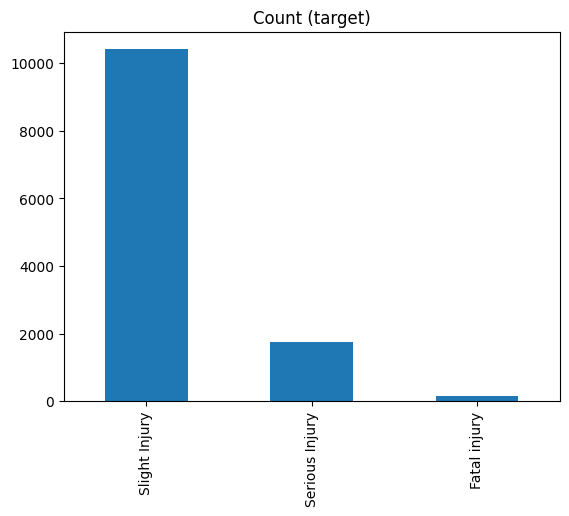

In [ ]:
target_count = df['Accident_severity'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [ ]:
from sklearn.preprocessing import LabelEncoder           #or one hot encoder
LE = LabelEncoder()
df=df.apply(LE.fit_transform)

<Axes: >

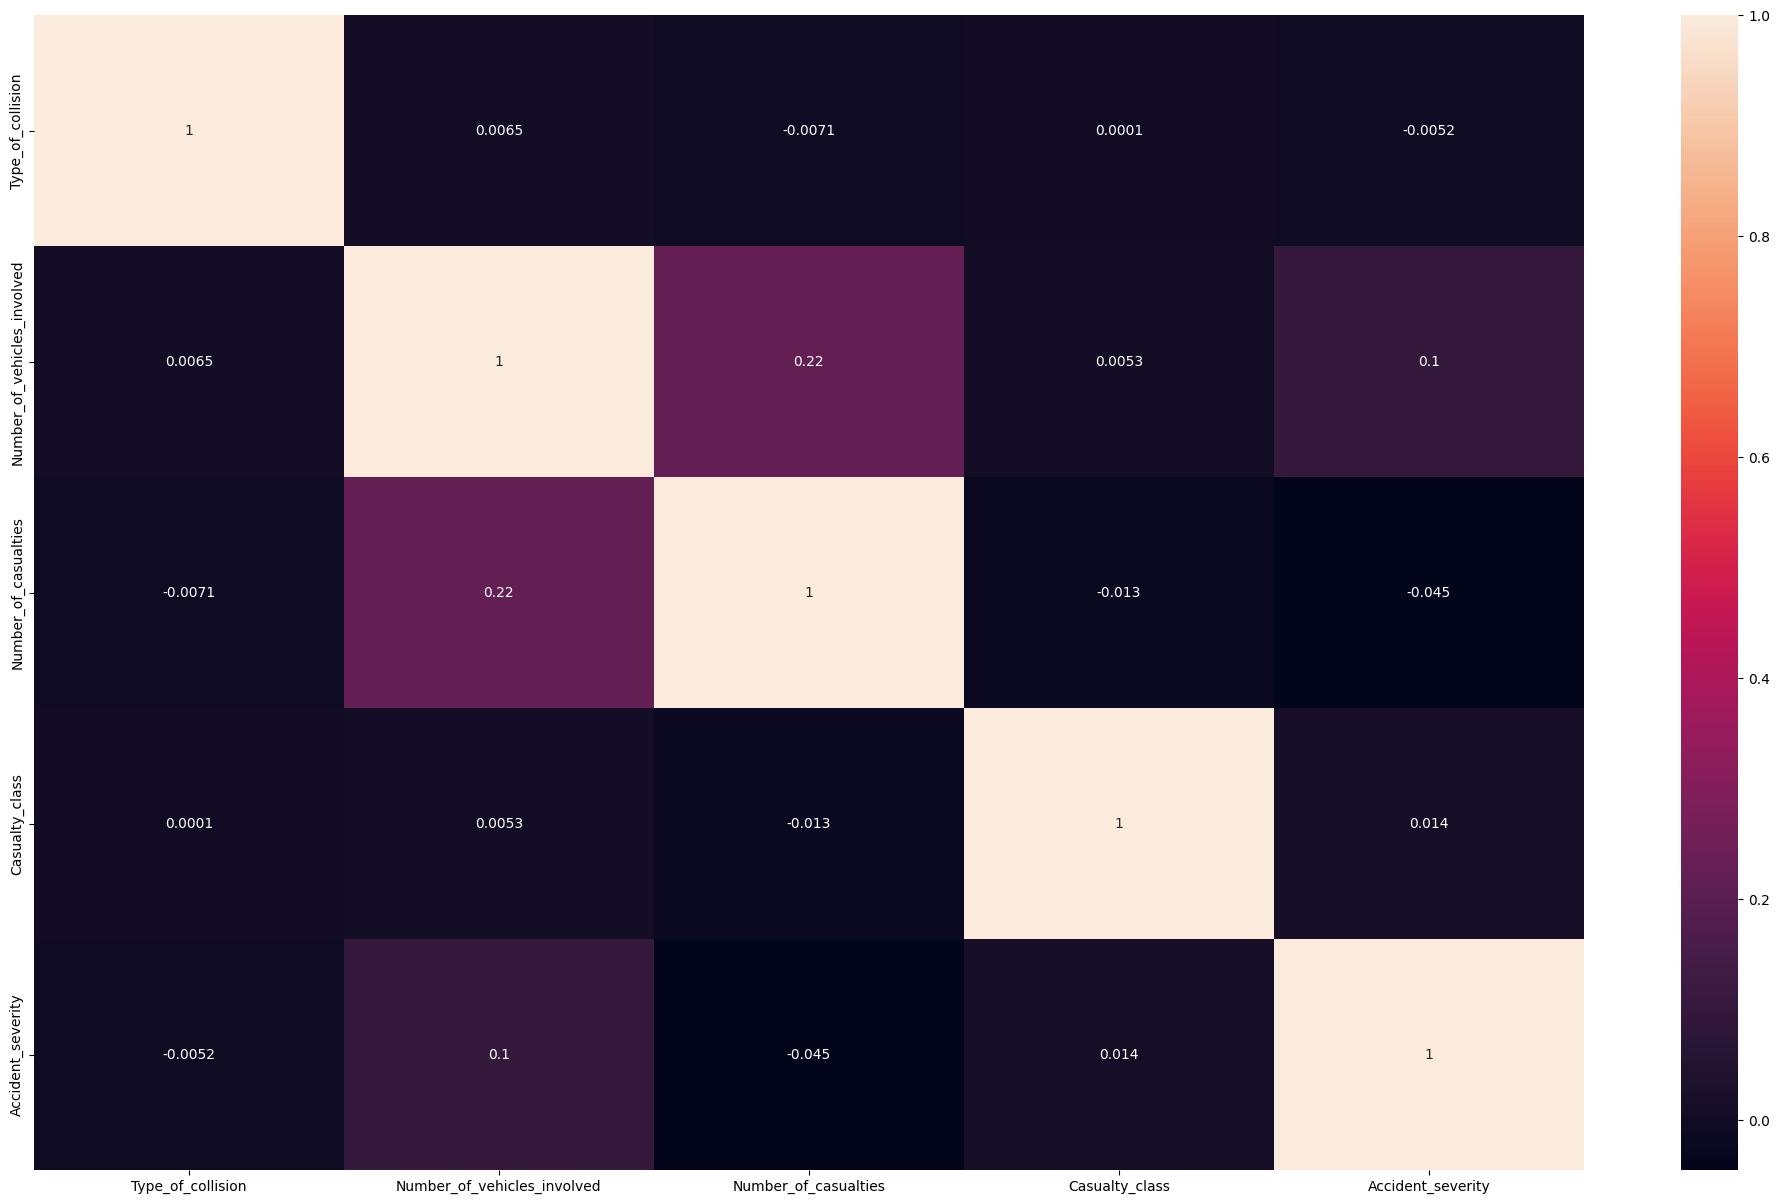

In [ ]:
plt.figure(figsize=[25,15])
sns.heatmap(df.corr(),annot=True)

In [ ]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 22:
        sns.countplot(y=col, data=df)
        plt.show()

In [ ]:
x = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(8621, 4) (3695, 4) (8621,) (3695,)


In [ ]:
# upsampling using smote

counter = Counter(ytrain)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
xtrain, ytrain = oversample.fit_resample(xtrain, ytrain)

counter = Counter(ytrain)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", xtrain.shape, ytrain.shape)

Class= 2, n=7324 (84.96%)
Class= 1, n=1191 (13.82%)
Class= 0, n=106 (1.23%)
Class= 2, n=7324 (33.33%)
Class= 1, n=7324 (33.33%)
Class= 0, n=7324 (33.33%)
Upsampled data shape:  (21972, 4) (21972,)


In [ ]:
x=df.drop(columns=["Accident_severity"])
y=df["Accident_severity"]

In [ ]:
models={"LogisticRegression":LogisticRegression(),
        "DecisionTreeClassifier":DecisionTreeClassifier(),
        "SVM":SVC(),
        "KNeighborsClassifier":KNeighborsClassifier(),
        "GNB":GaussianNB(),
       "RandomForestClassifier":RandomForestClassifier(),
        "AdaBoostClassifier":AdaBoostClassifier(),
        "GradientBoostingClassifier":GradientBoostingClassifier(),
        }

In [ ]:
# models,x,y,scaleFlag=0,1,2
def modelAccuracy(models,x,y,scaleFlag):
    #train/Test
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
    acc_result={}
    for name,model in models.items():
        #pipeline
        #1.Transformer -> 2.Model
        if(scaleFlag==1):
            model_pipeline=Pipeline([('MinMaxScler',MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
             model_pipeline=Pipeline([('StandardScaler',StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #training/testing on model pipeline
        model_fit=model_pipeline.fit(xtrain,ytrain)
        ypred=model_fit.predict(xtest)
        acc=accuracy_score(ytest,ypred)
        print("The Accuracy for ",name," is :",acc)
        acc_result[name]=acc
    return acc_result

In [ ]:
def bestModel(result):
    high=0
    for name,acc in result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name," with accuaracy =>",high)

In [ ]:
def bestParams(model,param,xtrain,ytrain):
    #cv
    cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3)
    grid_cv=GridSearchCV(estimator=model,param_grid=param,cv=cv,scoring="f1_weighted")
    res=grid_cv.fit(xtrain,ytrain)
    print("Best Parameters are ",res.best_params_)
    print("Best Accuracy is ",res.best_score_)

In [ ]:
acc=modelAccuracy(models,x,y,1)

The Accuracy for  LogisticRegression  is : 0.84375
The Accuracy for  DecisionTreeClassifier  is : 0.8368506493506493
The Accuracy for  SVM  is : 0.84375
The Accuracy for  KNeighborsClassifier  is : 0.8319805194805194
The Accuracy for  GNB  is : 0.8327922077922078
The Accuracy for  RandomForestClassifier  is : 0.8417207792207793
The Accuracy for  AdaBoostClassifier  is : 0.8433441558441559
The Accuracy for  GradientBoostingClassifier  is : 0.8449675324675324


In [ ]:
bestModel(acc)

Best Model is  GradientBoostingClassifier  with accuaracy => 0.8449675324675324
